<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Importing Necessary Modules

In [97]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [98]:
pd.options.display.float_format = '{:,.2f}'.format

### Loading the data

In [99]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [100]:
df_data.shape

(4324, 9)

#### Data has 4324 rows and 9 columns

In [101]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [102]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [103]:
df_data.isna().to_numpy().sum()

3360

In [104]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [105]:
df_data[df_data.duplicated()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status


#### <div style="color: orange;">3360 Rows contain NaN values in price columns</div>
#### <div style="color: green;">No Duplicated data</div>

#### Checking if all NaN values are in price columns

In [106]:
df_data[df_data.Price.isna()]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


#### So all the NaN values are in price column -- confirmed

# <div style="color: orange"><b> Section 02 </b></div>
## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [107]:
# Dropping first 2 columns
df_data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [108]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# <div style="color: orange"><b> Section 03 </b></div>
## Descriptive Statistics

In [109]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [110]:
# Checking if all the date time contain utc
df_data['Date'] = df_data[df_data.Date.str.contains(
    'UTC')].Date.str.removesuffix(' UTC')

In [111]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [112]:
# Convert columns into correct data types
df_data['Date'] = pd.to_datetime(df_data['Date'])
df_data['Price'] = df_data['Price'].str.replace(",", "").astype('float64')
df_data.dtypes

Organisation              object
Location                  object
Date              datetime64[ns]
Detail                    object
Rocket_Status             object
Price                    float64
Mission_Status            object
dtype: object

In [113]:
df_data['Organisation'] = df_data['Organisation'].convert_dtypes()
df_data["Location"] = df_data["Location"].convert_dtypes()
df_data["Detail"] = df_data["Detail"].convert_dtypes()
df_data["Rocket_Status"] = df_data["Rocket_Status"].convert_dtypes()
df_data["Mission_Status"] = df_data["Mission_Status"].convert_dtypes()
df_data.dtypes

Organisation      string[python]
Location          string[python]
Date              datetime64[ns]
Detail            string[python]
Rocket_Status     string[python]
Price                    float64
Mission_Status    string[python]
dtype: object

In [114]:
# convert to categorical data if possible
# df_data['Organisation'] = df_data['Organisation'].astype('category')
# df_data['Location'] = df_data['Location'].astype('category')
# df_data['Detail'] = df_data['Detail'].astype('category')
df_data['Rocket_Status'] = df_data['Rocket_Status'].astype('category')
df_data['Mission_Status'] = df_data['Mission_Status'].astype('category')
df_data.dtypes

Organisation      string[python]
Location          string[python]
Date              datetime64[ns]
Detail            string[python]
Rocket_Status           category
Price                    float64
Mission_Status          category
dtype: object

In [115]:
df_data.aggregate(['count', 'nunique'])

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4198,4324,4324,964,4324
nunique,56,137,4194,4278,2,56,4


In [116]:
df_data['Mission_Status'].unique()

['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure']
Categories (4, string): [Failure, Partial Failure, Prelaunch Failure, Success]

# <div style="color: orange"><b> Section 03 </b></div>
## Number of Launches per Company

#### Create a chart that shows the number of space mission launches by organisation.

In [117]:
launches = df_data['Organisation'].value_counts()

In [118]:
launches_bar = px.bar(x=launches.index, y=launches.values,
                      title='Launches by Organisation')
launches_bar.update_layout(xaxis_title='Organisation', yaxis_title='Launches')
launches_bar.show()

In [119]:
launches = launches[:20]
launches_bar = px.bar(x=launches.index, y=launches.values,
                      title='Launches by Organisation')
launches_bar.update_layout(xaxis_title='Organisation', yaxis_title='Launches')
launches_bar.show()
launches_bar.update_yaxes(type="log")
launches_bar.show()

In [120]:
launches = launches[:10]
launches_pie = px.pie(launches, values=launches.values,
                      names=launches.index, title='Launches by Organisation')
launches_pie.update_traces(textposition='outside', textinfo='percent+label')
launches_pie.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [121]:
rocket_status = df_data['Rocket_Status'].value_counts()

In [122]:
rocket_status_pie = px.pie(values=rocket_status.values,
                           names=rocket_status.index, title='Rocket Status')
rocket_status_pie.update_traces(
    textposition='outside', textinfo='percent+label')
rocket_status_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [123]:
mission_status = df_data['Mission_Status'].value_counts()
mission_status

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [124]:
mission_status_pie = px.pie(
    values=mission_status.values, names=mission_status.index, title='Mission Status')
mission_status_pie.update_traces(
    textposition='outside', textinfo='percent+label')
mission_status_pie.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [125]:
price_distribution = df_data[df_data['Price'].isna() == False].Price

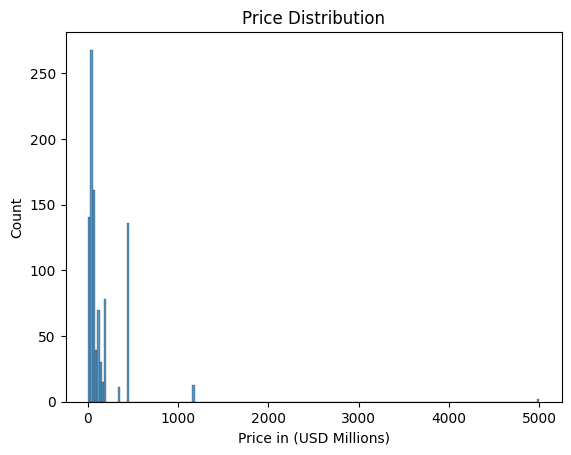

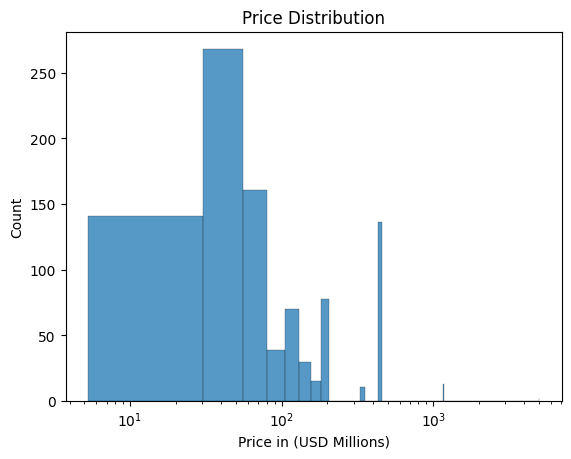

In [126]:
plt.figure()
sns.histplot(price_distribution)
plt.title('Price Distribution')
plt.xlabel('Price in (USD Millions)')
plt.show()

plt.figure()
sns.histplot(price_distribution)
plt.title('Price Distribution')
plt.xlabel('Price in (USD Millions)')
plt.semilogx()
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [127]:
df_data['Country'] = df_data['Location'].str.split(',').str[-1].str.strip()
df_data['Country'] = df_data['Country'].convert_dtypes().astype('category')
df_data['Country'] = df_data['Country'].replace('Russia', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('New Mexico', 'USA')
df_data['Country'] = df_data['Country'].replace(
    'Pacific Missile Range Facility', 'USA')
df_data['Country'] = df_data['Country'].replace('Yellow Sea', 'China')
df_data['Country'] = df_data['Country'].replace(
    'Shahrud Missile Test Site', 'Iran')
df_data['Country'] = df_data['Country'].replace('Gran Canaria', 'USA')
df_data['Country'] = df_data['Country'].replace(
    'Barents Sea', 'Russian Federation')
df_data['Country'] = df_data['Country'].replace('Pacific Ocean', 'USA')

df_data['Country'].value_counts()

Country
Russian Federation    1398
USA                   1387
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
Brazil                   3
South Korea              3
Name: count, dtype: int64

In [128]:
def get_alpha3(country):
    try:
        if country == 'Iran':
            return 'IRN'
        if country == 'North Korea':
            return 'PRK'
        if country == 'South Korea':
            return 'KOR'
        return countries.get(country).alpha3
    except KeyError as e:
        return e


df_data['Country_Code'] = df_data['Country'].apply(get_alpha3)  # type: ignore

In [129]:
df_data['Country_Code'].value_counts()

Country_Code
RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
BRA       3
KOR       3
Name: count, dtype: int64

# Use a Choropleth Map to Show the Number of Failures by Country


In [130]:
# geojson = px.data.gapminder().query("year==2007")
# geojson

In [151]:
import os


number_of_failures = (
    df_data[df_data['Mission_Status'] == 'Failure']
    .groupby('Country')
    .count()
    .reset_index()

)
number_of_failures = number_of_failures[['Country', 'Mission_Status']]

number_of_failures["ISO"] = number_of_failures['Country'].apply(
    get_alpha3)  # type: ignore
number_of_failures

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11240\1455072860.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Country,Mission_Status,ISO
0,Australia,3,AUS
1,Brazil,2,BRA
2,China,19,CHN
3,France,13,FRA
4,India,8,IND
5,Iran,8,IRN
6,Israel,2,ISR
7,Japan,10,JPN
8,Kazakhstan,72,KAZ
9,Kenya,0,KEN


In [160]:

world_map = px.choropleth(
    number_of_failures, locations='ISO', color='Country', hover_name='Country', projection='mercator', color_continuous_scale=px.colors.sequential.Plasma, width=1200, height=1000, title='Number of Failures by Country'
)
world_map.show()

d:\PersonalProjects\Portfolio_18_Analyse_Space_Race\.venv\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [161]:
group_by_for_sunburst = (df_data[["Country", "Organisation", "Mission_Status"]]
                         .query("Mission_Status == 'Success'")
                         .groupby(['Country', 'Organisation'], observed=True, as_index=False)
                         .agg({'Mission_Status': pd.Series.count})
                         .sort_values(by='Mission_Status', ascending=False)
                         )
group_by_for_sunburst
# df_data.query("Organisation == 'i-Space'")

,Country,Organisation,Mission_Status
36,Russian Federation,RVSN USSR,1119
24,Kazakhstan,RVSN USSR,495
7,France,Arianespace,267
3,China,CASC,231
46,USA,General Dynamics,203
50,USA,NASA,186
39,Russian Federation,VKS RF,147
54,USA,ULA,139
44,USA,Boeing,131
55,USA,US Air Force,129


In [162]:
sunburst = px.sunburst(group_by_for_sunburst, path=[
                       'Country', 'Organisation'], values='Mission_Status', title='Number of Successful Launches by Country and Organisation')
sunburst.show()

d:\PersonalProjects\Portfolio_18_Analyse_Space_Race\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

d:\PersonalProjects\Portfolio_18_Analyse_Space_Race\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [168]:
money_by_organisation = ( 
                        df_data[["Country", "Organisation", "Price"]]
                        .query('Price > 0')
                        .groupby(['Country', 'Organisation'], observed=True, as_index=False)
                        .agg({'Price': pd.Series.sum})
                        .sort_values(by='Price', ascending=False)
                        .reset_index(drop=True)
)
money_by_organisation

,Country,Organisation,Price
0,USA,NASA,"76,280.00"
1,France,Arianespace,"16,248.00"
2,USA,ULA,"14,798.00"
3,Kazakhstan,RVSN USSR,"10,000.00"
4,China,CASC,"6,340.26"
5,USA,SpaceX,"5,444.00"
6,USA,Northrop,"3,930.00"
7,Japan,MHI,"3,532.50"
8,India,ISRO,"2,177.00"
9,USA,US Air Force,"1,550.92"


In [171]:
money_spend = px.bar(money_by_organisation, x='Organisation', y='Price', title='Money Spent by Organisation')
money_spend.update_layout(xaxis_title='Organisation', yaxis_title='Money Spent in (USD Millions)')
money_spend.show()

In [172]:
money_sunburst = px.sunburst(money_by_organisation, path=['Country', 'Organisation'], values='Price', title='Money Spent by Country and Organisation')
money_sunburst.show()

d:\PersonalProjects\Portfolio_18_Analyse_Space_Race\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

d:\PersonalProjects\Portfolio_18_Analyse_Space_Race\.venv\Lib\site-packages\plotly\express\_core.py:1699: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Analyse the Amount of Money Spent by Organisation per Launch


In [174]:
money_by_organisation = ( 
                        df_data[["Organisation", "Price"]]
                        .query('Price > 0')
                        .groupby('Organisation', observed=True, as_index=False)
                        .agg({'Price': 'mean'})
                        .sort_values(by='Price', ascending=False)
                        .reset_index(drop=True)
)
money_by_organisation

,Organisation,Price
0,RVSN USSR,"5,000.00"
1,NASA,511.95
2,Boeing,177.29
3,Arianespace,170.26
4,ULA,151.00
5,ILS,101.54
6,MHI,95.47
7,Martin Marietta,80.16
8,US Air Force,59.65
9,JAXA,56.00


In [175]:
avg_by_organisation = px.bar(money_by_organisation, x='Organisation', y='Price', title='Average Money Spent by Organisation')
avg_by_organisation.update_layout(xaxis_title='Organisation', yaxis_title='Average Money Spent in (USD Millions)')
avg_by_organisation.show()

## Russia is showing wrong results, because price data is not available for all Russian Launches. Specially by RVSN USSR

In [179]:
df_data.query("Organisation == 'RVSN USSR' and Price > 0").count()

Organisation      2
Location          2
Date              2
Detail            2
Rocket_Status     2
Price             2
Mission_Status    2
Country           2
Country_Code      2
dtype: int64

# Chart the Number of Launches per Year

In [239]:
df_data["Year"] = df_data["Date"].dt.year.convert_dtypes(pd.Int32Dtype)
df_data["Month"] = df_data["Date"].dt.month.convert_dtypes(pd.Int32Dtype)
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,7
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,2
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957,12
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957,11


In [240]:
launches_per_year = df_data.groupby('Year', observed=True, as_index=False).agg({'Mission_Status': pd.Series.count})
launches_per_year = launches_per_year.query("Year > 1957 and Year < 2021")
launches_per_year

,Year,Mission_Status
1,1958,22
2,1959,20
3,1960,38
4,1961,52
5,1962,81
...,...,...
59,2016,88
60,2017,90
61,2018,117
62,2019,107


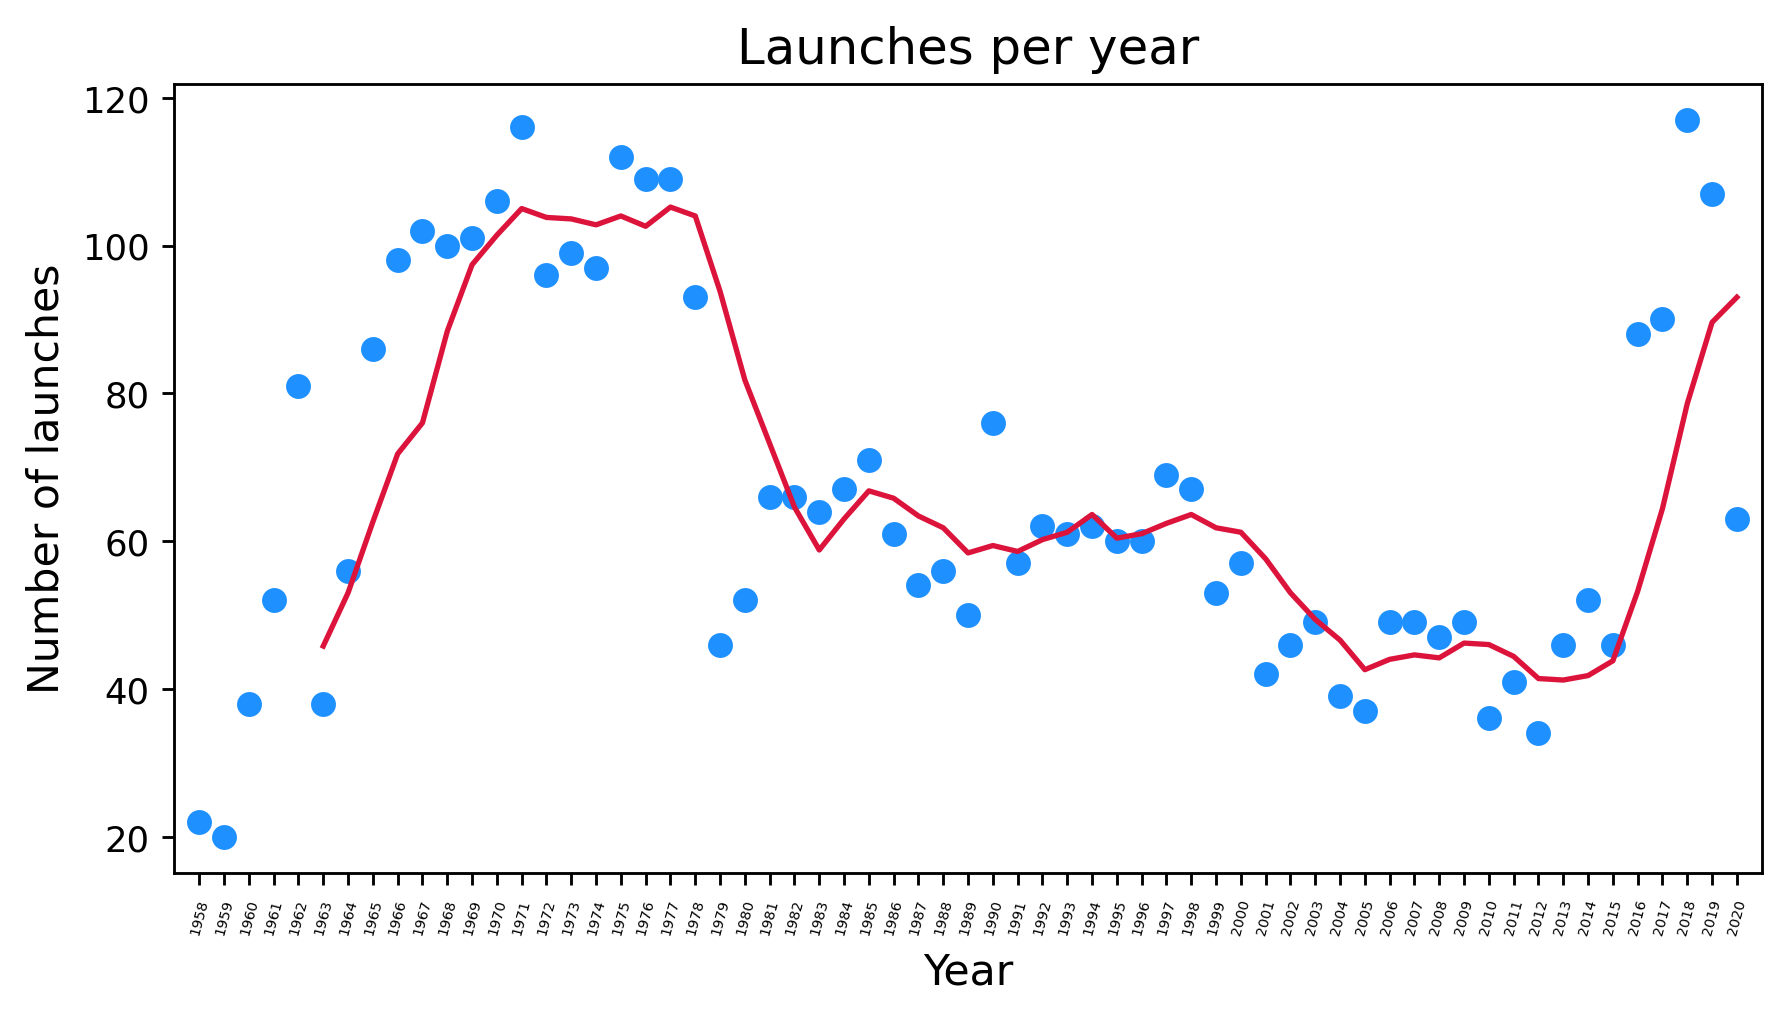

In [241]:
plt.figure(figsize=(8, 4), dpi=256)
launches_per_year["rolling_average"] = launches_per_year["Mission_Status"].rolling(5).mean()
plt.scatter(launches_per_year.Year, launches_per_year["Mission_Status"], label="Launches Per Year", c="dodgerblue")
plt.plot(launches_per_year.Year[5:], launches_per_year.rolling_average[5:], color="crimson", label="Rolling average (5 Year) by Year")
plt.xticks(np.arange(1958, 2021), rotation=75, fontsize=4)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of launches", fontsize=12)
plt.xlim([1957, 2021])
plt.title("Launches per year", fontsize=14)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [247]:
launches_month = (
        df_data.groupby(['Year', "Month"], observed=False, as_index=False)
        .agg({'Mission_Status': pd.Series.count})
        .sort_values(by=['Year', 'Month'], ascending=True)
        .reset_index(drop=True)
)
launches_month["year_month"] = launches_month["Year"].astype(str) + "-" + launches_month["Month"].astype(str)
launches_month

,Year,Month,Mission_Status,year_month
0,1957,10,1,1957-10
1,1957,11,1,1957-11
2,1957,12,1,1957-12
3,1958,2,2,1958-2
4,1958,3,3,1958-3
...,...,...,...,...
742,2020,4,5,2020-4
743,2020,5,9,2020-5
744,2020,6,7,2020-6
745,2020,7,14,2020-7


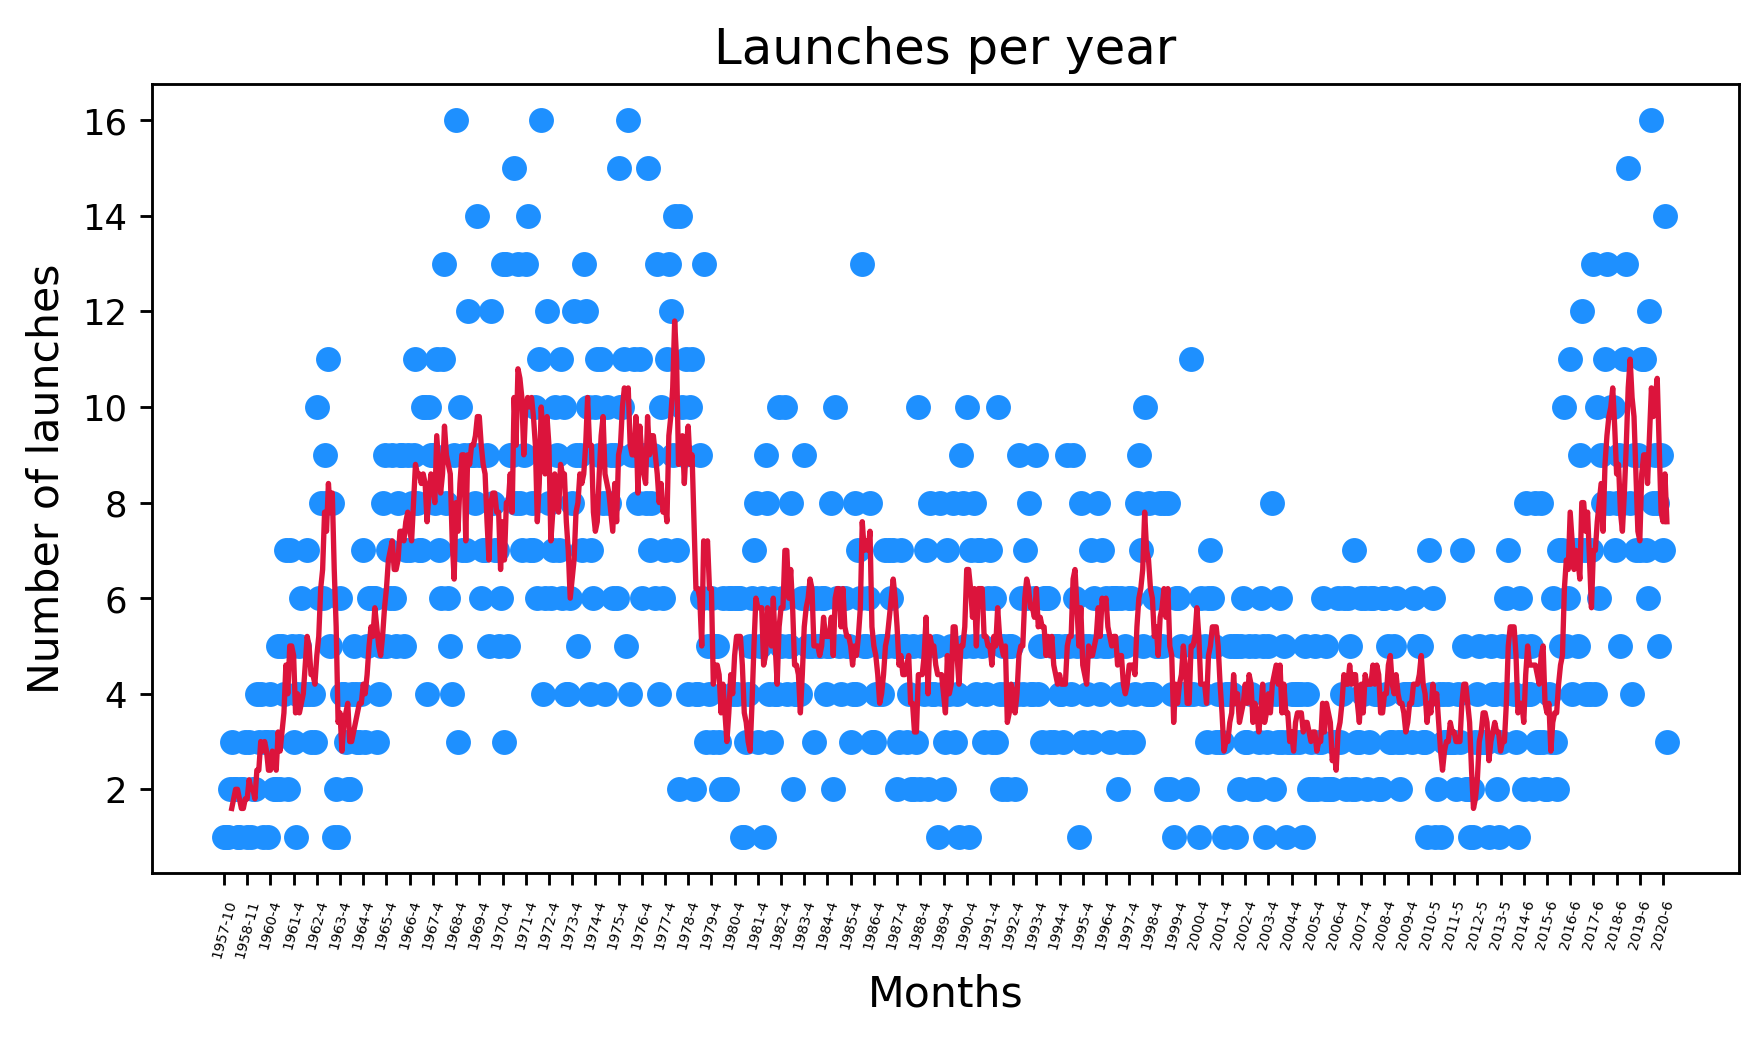

In [256]:
plt.figure(figsize=(8, 4), dpi=256)

launches_month["rolling_average"] = launches_month["Mission_Status"].rolling(5).mean()
plt.scatter(launches_month.year_month, launches_month["Mission_Status"], label="Launches Per Month", c="dodgerblue")
plt.plot(launches_month.year_month[4:], launches_month.rolling_average[4:], color="crimson", label="Rolling average (5 months) by month")
plt.xlabel("Months", fontsize=12)
plt.xticks(launches_month.year_month[::12], rotation=75, fontsize=4)
plt.ylabel("Number of launches", fontsize=12)
plt.title("Launches per year", fontsize=14)
plt.show()

In [257]:
launches_month.sort_values(by='Mission_Status', ascending=False)

,Year,Month,Mission_Status,year_month,rolling_average
738,2019,12,16,2019-12,10.40
164,1971,12,16,1971-12,10.00
209,1975,9,16,1975-9,10.40
120,1968,4,16,1968-4,8.00
204,1975,4,15,1975-4,9.00
...,...,...,...,...,...
279,1981,7,1,1981-7,4.60
269,1980,9,1,1980-9,3.60
268,1980,8,1,1980-8,4.60
59,1963,3,1,1963-3,3.40


In [262]:
launches_only_month = launches_month.groupby('Month', observed=True, as_index=False).agg({'Mission_Status': pd.Series.sum})
launches_only_month = launches_only_month.sort_values(by='Mission_Status', ascending=False)

In [263]:
launches_only_month["Month_Name"] = launches_only_month["Month"].apply(lambda x: datetime.strptime(str(x), "%m").strftime("%B"))
launches_only_month

,Month,Mission_Status,Month_Name
11,12,430,December
5,6,386,June
9,10,375,October
3,4,366,April
7,8,358,August
8,9,354,September
2,3,349,March
6,7,347,July
10,11,325,November
1,2,323,February


In [264]:
launches_by_month = px.bar(launches_only_month, x='Month_Name', y='Mission_Status', title='Launches by Month')
launches_by_month.update_layout(xaxis_title='Month', yaxis_title='Launches')
launches_by_month.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [269]:
average_price_by_year = df_data.groupby('Year', observed=True, as_index=False).agg({'Price': pd.Series.mean})
average_price_by_year = average_price_by_year.query("Year > 1957 and Year < 2021 and Price > 0")
average_price_by_year

,Year,Price
7,1964,63.23
8,1965,63.23
9,1966,59.00
10,1967,216.29
11,1968,279.20
12,1969,609.50
13,1970,"1,160.00"
14,1971,"1,160.00"
15,1972,"1,160.00"
16,1973,"1,160.00"


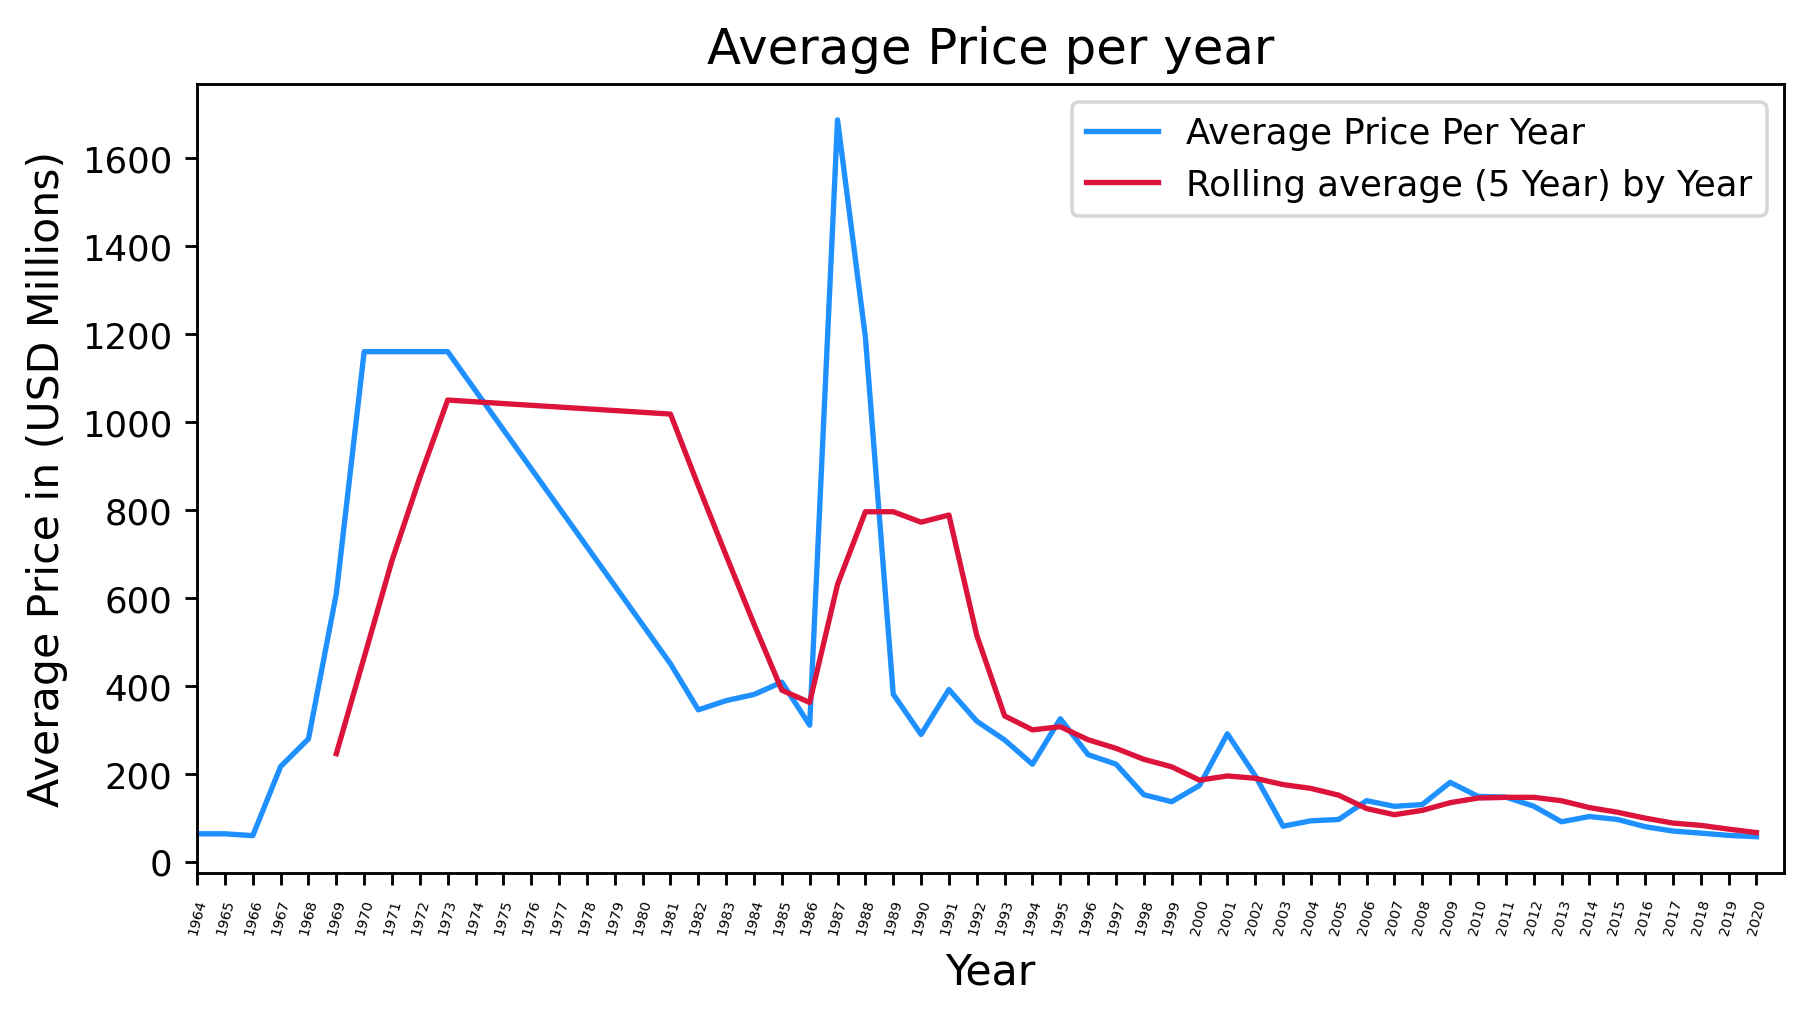

In [272]:
plt.figure(figsize=(8, 4), dpi=256)
average_price_by_year["rolling_average"] = average_price_by_year["Price"].rolling(5).mean()
plt.plot(average_price_by_year.Year, average_price_by_year["Price"], label="Average Price Per Year", c="dodgerblue")
plt.plot(average_price_by_year.Year[5:], average_price_by_year.rolling_average[5:], color="crimson", label="Rolling average (5 Year) by Year")
plt.xticks(np.arange(1964, 2021), rotation=75, fontsize=4)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price in (USD Millions)", fontsize=12)
plt.xlim([1964, 2021])
plt.title("Average Price per year", fontsize=14)
plt.legend()
plt.show()